# Terrestrial Acidification LEAFs
Terrestrial Acidification LEAFs were only recalculated to obtained regional averages, with no modelling modifications after the original Roy et al. (2021) paper.

## Step 1 - Data Gathering and Processing
Original shapefiles and other data from Roy et al (2021) were obtained directly from authors. Loading and inspecting the data...

In [2]:
# Modules
import polars as pl
import sbtn_leaf.map_calculations as mc
import sbtn_leaf.map_plotting as mp
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Data
ac_mp_shp = gpd.read_file("../data/ImpactWorldPlus/SHP/AcidTerr_Midpoint_native.shp")
nh3_shp = gpd.read_file("../data/terrestrial_acidification_Shapefiles/CF_terr_acidification_NH3_Polygon.shp")
world_emissions = pl.read_excel("../data/ImpactWorldPlus//Annual environmental intervention - AcidTerr_ AcidFW_ EutroMar.xlsx")

### Inspecting the shapefiles

NH3 first...

In [4]:
nh3_shp.head()

,OBJECTID,Id,gridcode,Shape_Leng,Shape_Area,CF,geometry
0,1,1,584,10.0,6.25,5.840000e-16,"POLYGON ((-118 74.36413, -120.5 74.36413, -120..."
1,2,2,17,10.0,6.25,1.700000e-17,"POLYGON ((-115.5 74.36413, -118 74.36413, -118..."
2,3,3,0,10.0,6.25,0.000000e+00,"POLYGON ((-113 74.36413, -115.5 74.36413, -115..."
3,4,4,4,10.0,6.25,4.000000e-18,"POLYGON ((-110.5 74.36413, -113 74.36413, -113..."
4,5,5,17,10.0,6.25,1.700000e-17,"POLYGON ((-108 74.36413, -110.5 74.36413, -110..."


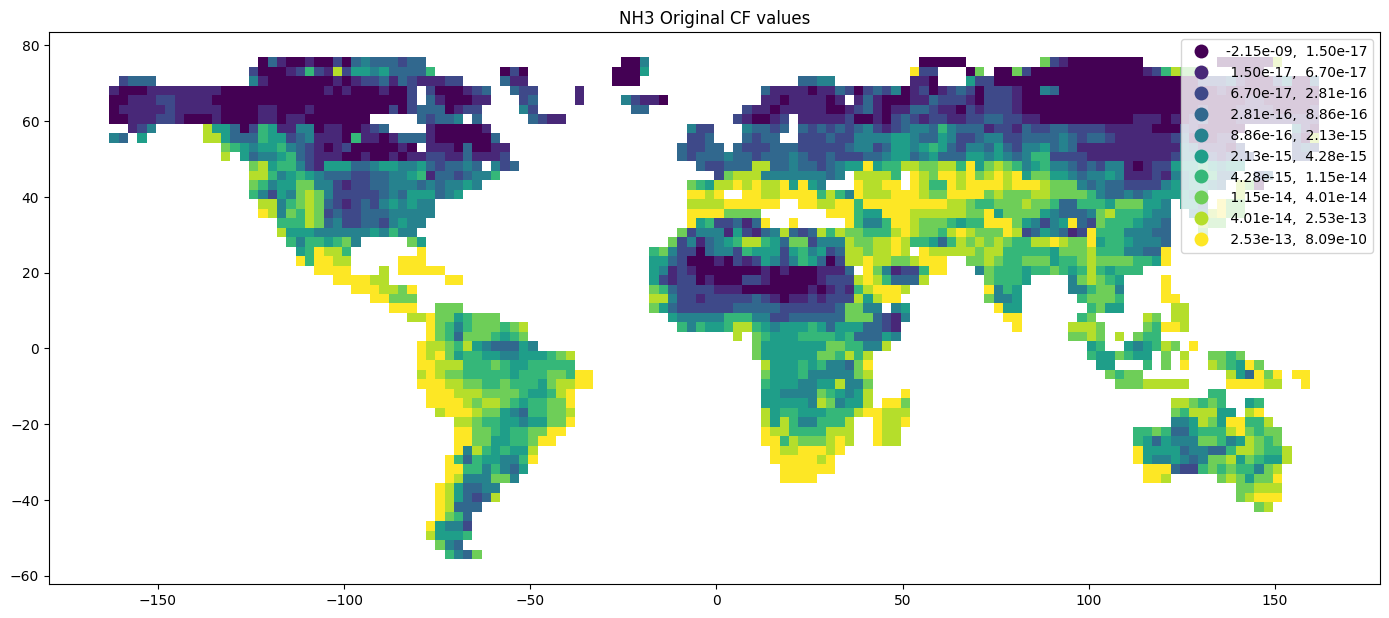

In [5]:
# nh3_shp plot
fig, ax = plt.subplots(figsize=(14, 8))
nh3_shp.plot(column="CF", ax=ax, cmap="viridis", legend=True, 
           legend_kwds={'fmt': '{:.2e}'}, 
           scheme="quantiles",
            k=10
           ) 

ax.set_title("NH3 Original CF values")
plt.tight_layout() 
plt.show()

impact world now...

In [6]:
ac_mp_shp.head()

,IDCELL,LONGITUDE,LATITUDE,IMPCAT,MP_OR_EP,UNIT,RESOLUTION,CELL_ID,NH3,NOX,SO2,geometry
0,12961,-180.0,89.0,AcidTerr,Midpoint,[kg SO2 eq/kg],Native,12961.0,0.0,0.0,0.0,"POLYGON ((-180 91, -177.5 91, -177.5 89, -180 ..."
1,12962,-177.5,89.0,AcidTerr,Midpoint,[kg SO2 eq/kg],Native,12962.0,0.0,0.0,0.0,"POLYGON ((-177.5 91, -175 91, -175 89, -177.5 ..."
2,12963,-175.0,89.0,AcidTerr,Midpoint,[kg SO2 eq/kg],Native,12963.0,0.0,0.0,0.0,"POLYGON ((-175 91, -172.5 91, -172.5 89, -175 ..."
3,12964,-172.5,89.0,AcidTerr,Midpoint,[kg SO2 eq/kg],Native,12964.0,0.0,0.0,0.0,"POLYGON ((-172.5 91, -170 91, -170 89, -172.5 ..."
4,12965,-170.0,89.0,AcidTerr,Midpoint,[kg SO2 eq/kg],Native,12965.0,0.0,0.0,0.0,"POLYGON ((-170 91, -167.5 91, -167.5 89, -170 ..."


c:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\.venv\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 9.
  self.bins = quantile(y, k=k)


<Axes: >

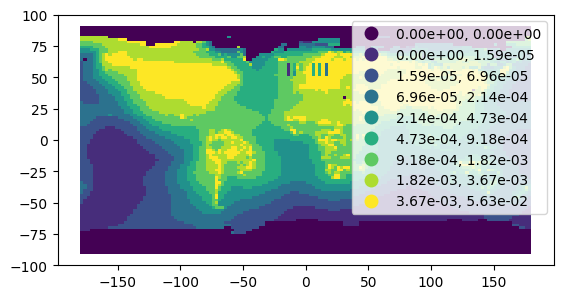

In [7]:
ac_mp_shp.plot(column="NH3",  cmap="viridis", legend=True, 
           legend_kwds={'fmt': '{:.2e}'}, 
           scheme="quantiles",
            k=10
           )

In [8]:
all_data = list(ac_mp_shp["SO2"]) + list(ac_mp_shp["NH3"]) + list(ac_mp_shp["NOX"])
n_bins = 15

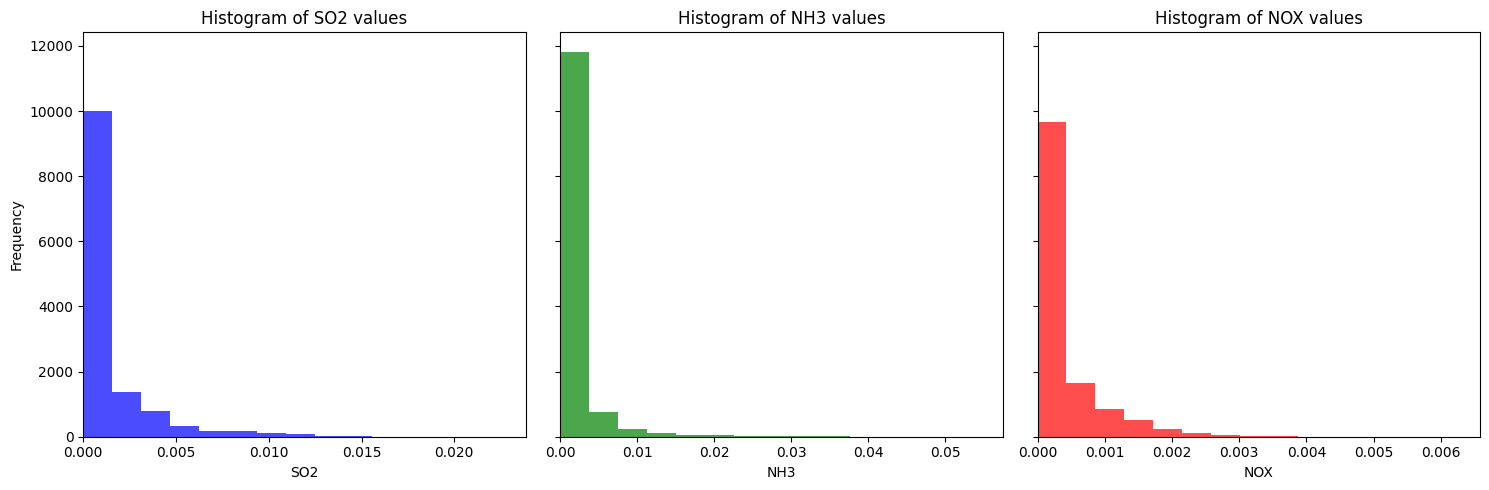

In [9]:
# Plotting histograms in a single figure using individual min/max per plot
so2 = ac_mp_shp["SO2"].astype(float)
nh3 = ac_mp_shp["NH3"].astype(float)
nox = ac_mp_shp["NOX"].astype(float)

def padded_range(series, pad_frac=0.02, min_clip=0.0):
    vmin = series.min()
    vmax = series.max()
    if np.isclose(vmin, vmax):
        low = vmin - 0.5 if vmin != 0 else -0.5
        high = vmax + 0.5 if vmax != 0 else 0.5
    else:
        span = vmax - vmin
        low = vmin - pad_frac * span
        high = vmax + pad_frac * span
    # avoid negative lower bound for variables that are non-negative
    if vmin >= 0:
        low = max(low, min_clip)
    return low, high

# Create a figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot SO2 histogram
axes[0].hist(so2, bins=n_bins, color='blue', alpha=0.7)
axes[0].set_title("Histogram of SO2 values")
axes[0].set_xlabel("SO2")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(*padded_range(so2))

# Plot NH3 histogram
axes[1].hist(nh3, bins=n_bins, color='green', alpha=0.7)
axes[1].set_title("Histogram of NH3 values")
axes[1].set_xlabel("NH3")
axes[1].set_xlim(*padded_range(nh3))

# Plot NOX histogram
axes[2].hist(nox, bins=n_bins, color='red', alpha=0.7)
axes[2].set_title("Histogram of NOX values")
axes[2].set_xlabel("NOX")
axes[2].set_xlim(*padded_range(nox))

plt.tight_layout()
plt.show()

C:\Users\loyola\AppData\Local\Temp\ipykernel_36392\1795378533.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax_box.boxplot([so2_adj, nh3_adj, nox_adj], labels=["SO2", "NH3", "NOX"], patch_artist=True)


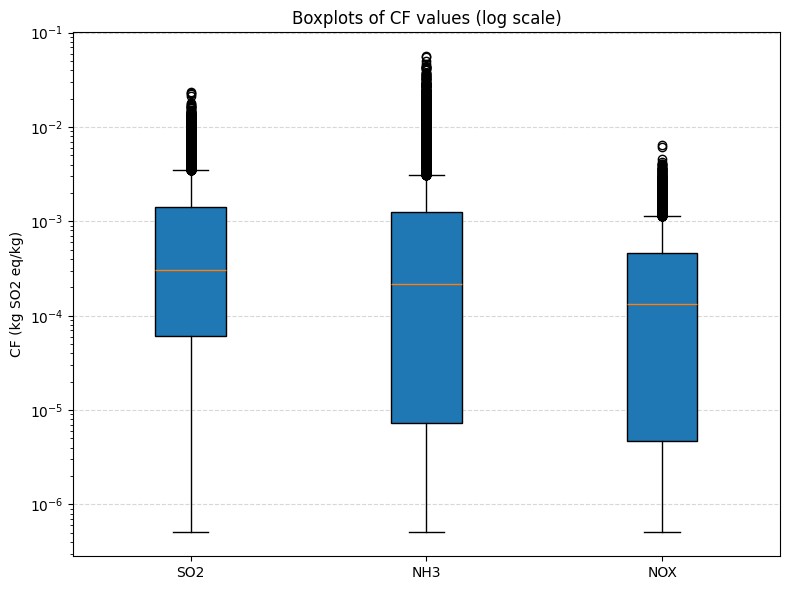

In [11]:
# replace zeros with a small offset so log scale works
positive_vals = [v for v in all_data if v > 0]
min_pos = min(positive_vals) if positive_vals else 1e-20
eps = min_pos * 0.5 if min_pos > 0 else 1e-20

so2_adj = so2 + eps
nh3_adj = nh3 + eps
nox_adj = nox + eps

fig_box, ax_box = plt.subplots(figsize=(8, 6))
ax_box.boxplot([so2_adj, nh3_adj, nox_adj], labels=["SO2", "NH3", "NOX"], patch_artist=True)
ax_box.set_title("Boxplots of CF values (log scale)")
ax_box.set_ylabel("CF (kg SO2 eq/kg)")
ax_box.set_yscale("log")
ax_box.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


These boxplot aligned with the middle row of values presented in Fig 1 from Roy et al. (2014), which are in  mol H+ L− 1 × m2 × keq− 1 × yr, thus they need to be transformed into ${\small SO_2-eq.}$ For this, the total emissions per grid cell need to be imported and multiplied by these factors.

In [12]:
we = world_emissions[['Cell ID', 'SO2_Elem flow_kg', 'NOX_Elem flow_kg', 'NH3_Elem flow_kg', 'SO4_Elem flow_kg', 'HNO3_Elem flow_kg',]]
we = we.rename({"Cell ID": "CELL_ID"}).to_pandas()

In [17]:
ac_im = ac_mp_shp.merge(we, how="left", on="CELL_ID")

Calculating the impacts...

In [14]:
ac_im["im_nh3"] = ac_im["NH3"] * ac_im["NH3_Elem flow_kg"]
ac_im["im_nox"] = ac_im["NOX"] * ac_im["NOX_Elem flow_kg"]
ac_im["im_so2"] = ac_im["SO2"] * ac_im["SO2_Elem flow_kg"]

Now calculating the total SO2 global impact and emissions

In [15]:
SO2_global_impact = ac_im["im_so2"].sum()
SO2_global_emissions = ac_im["SO2_Elem flow_kg"].sum()

Finally calculating the ${\small SO_2}$ global normalization factor. LCA CFs for acidification are traditionally expressed as ${\small SO_2-eq,}$ So 1 kg ${\small SO_2}$ global average has the impact of the global weighted emissions of ${\small SO_2}$.

In [16]:
SO2_global_nf = SO2_global_impact/SO2_global_emissions
print(f"SO2 normalization factor: {SO2_global_nf.round(4)} [mol H+/kg SO2]")

SO2 normalization factor: 0.0022 [mol H+/kg SO2]


Now expressing CFs in actual kg SO2-eq.

In [18]:
ac_im["cf_nh3"] = ac_im["NH3"]/SO2_global_nf
ac_im["cf_nox"] = ac_im["NOX"]/SO2_global_nf
ac_im["cf_so2"] = ac_im["SO2"]/SO2_global_nf

Plotting...

c:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\.venv\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 9.
  self.bins = quantile(y, k=k)


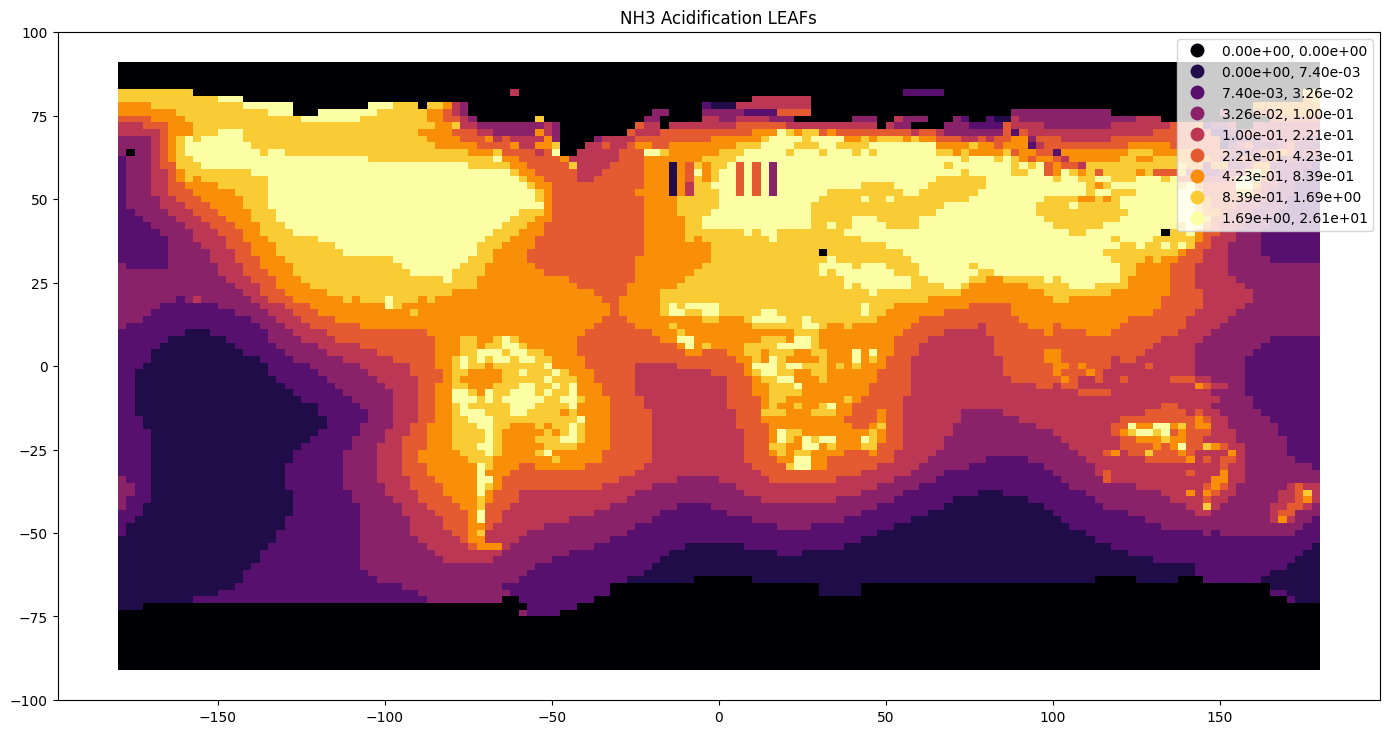

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
ac_im.plot(column="cf_nh3",  cmap="inferno", legend=True, 
           legend_kwds={'fmt': '{:.2e}'}, 
           scheme="quantiles",
            k=10, ax = ax
           )

ax.set_title("NH3 Acidification LEAFs")
plt.tight_layout() 
plt.show()

c:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\.venv\Lib\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 9.
  self.bins = quantile(y, k=k)


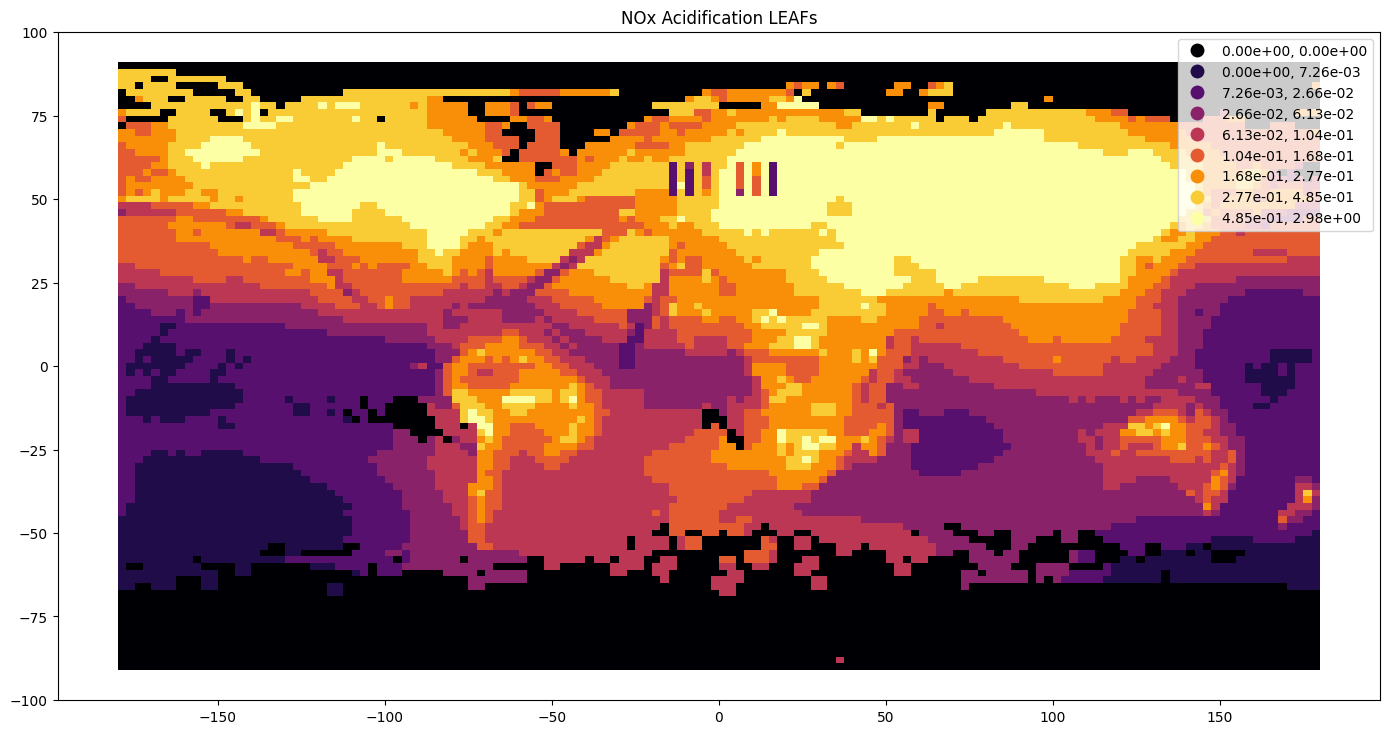

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
ac_im.plot(column="cf_nox",  cmap="inferno", legend=True, 
           legend_kwds={'fmt': '{:.2e}'}, 
           scheme="quantiles",
            k=10, ax = ax
           )

ax.set_title("NOx Acidification LEAFs")
plt.tight_layout() 
plt.show()

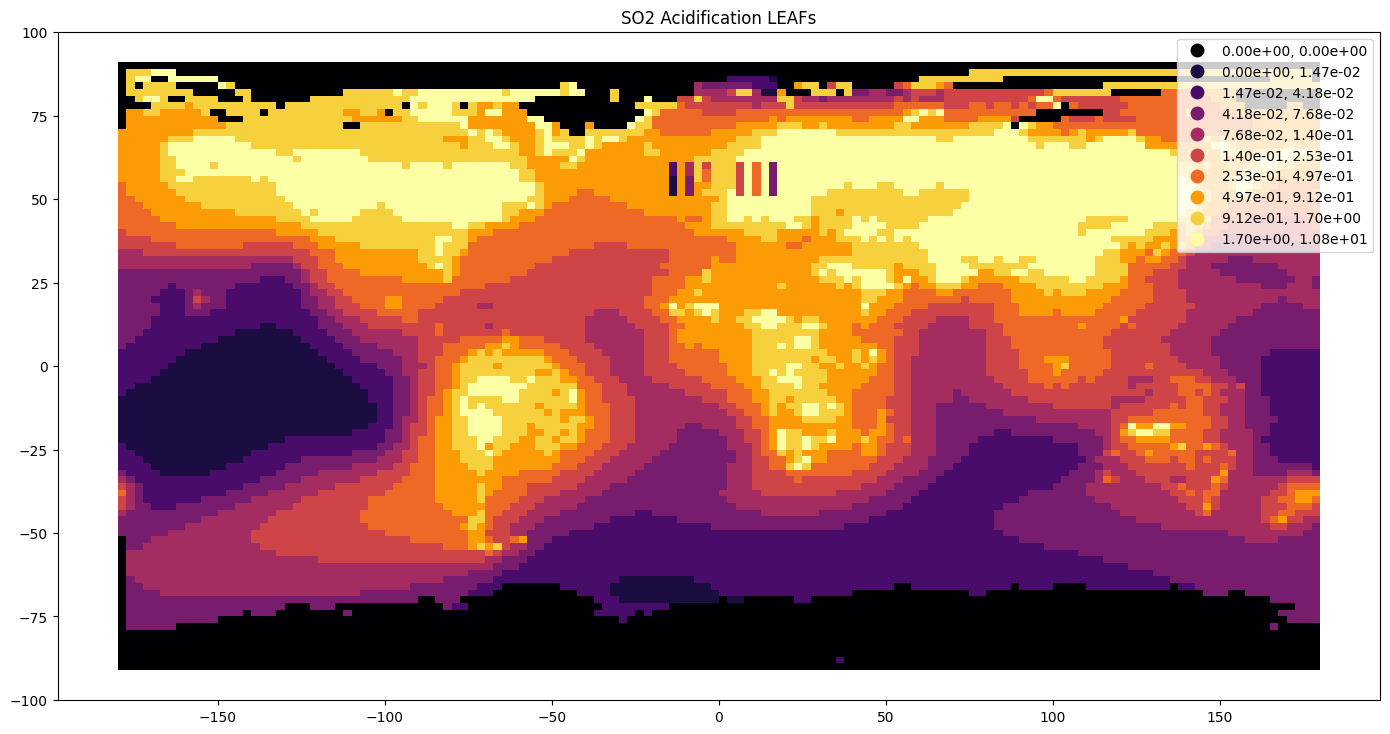

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))
ac_im.plot(column="cf_so2",  cmap="inferno", legend=True, 
           legend_kwds={'fmt': '{:.2e}'}, 
           scheme="quantiles",
            k=10, ax = ax
           )

ax.set_title("SO2 Acidification LEAFs")
plt.tight_layout() 
plt.show()

Checking some graphics...

C:\Users\loyola\AppData\Local\Temp\ipykernel_36392\3090652143.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_adj, labels=[c.replace("cf_", "").upper() for c in cols], patch_artist=True)


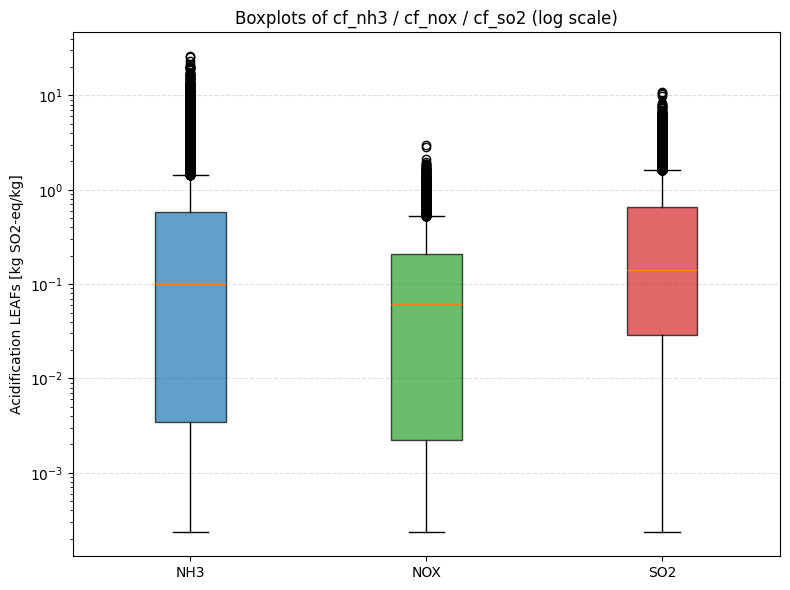

In [24]:
# Boxplot of the three cf_ columns in ac_im
cols = ["cf_nh3", "cf_nox", "cf_so2"]
data = [ac_im[c].astype(float).fillna(0) for c in cols]

# determine small offset to avoid zeros when using log scale
positive_vals = [v for arr in data for v in arr if v > 0]
if positive_vals:
    eps_local = min(positive_vals) * 0.5
else:
    eps_local = 1e-20

data_adj = [arr + eps_local for arr in data]

fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(data_adj, labels=[c.replace("cf_", "").upper() for c in cols], patch_artist=True)
# style boxes
colors = ["#1f77b4", "#2ca02c", "#d62728"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_yscale("log")
ax.set_ylabel("Acidification LEAFs [kg SO2-eq/kg]")
ax.set_title("Boxplots of cf_nh3 / cf_nox / cf_so2 (log scale)")
ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

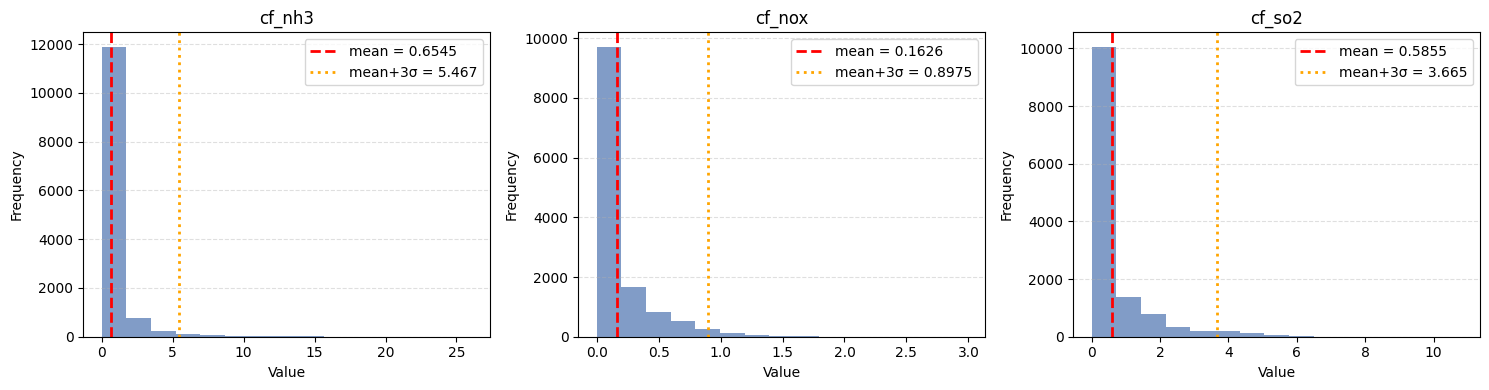

In [26]:
# Histograms for all cf_ columns with mean and mean+3*std lines
cols = [c for c in ac_im.columns if str(c).startswith("cf_")]

n = len(cols)
fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), squeeze=False)
axes = axes.ravel()

for ax, col in zip(axes, cols):
    series = ac_im[col].astype(float).dropna()
    if series.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center")
        ax.set_title(col)
        continue

    mean = series.mean()
    std = series.std()
    thr = mean + 3 * std

    ax.hist(series, bins=n_bins, color="#4C72B0", alpha=0.7)
    ax.axvline(mean, color="red", ls="--", lw=2, label=f"mean = {mean:.4g}")
    ax.axvline(thr, color="orange", ls=":", lw=2, label=f"mean+3σ = {thr:.4g}")

    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

Which shows a heavily skewed distribution, as usual in these type of indicators, with not too many values 3 standards deviation above the mean.

## Step 2 - Harmonization

Now transforming into UHTH aligned rasters for harmonizing into the other land quality indicators

In [82]:
#uhth map
uhth_fp = "../data/CountryLayers/soc_uht_map.tif"

Loading reference raster info:

In [84]:
mc.rasterize_shapefile_to_target_raster(
    gdf=ac_im,
    raster_filepath=uhth_fp,
    value_column="cf_nh3",
    output_path="../LEAFs/acidification/rasters/acid_nh3.tif",
    no_data=np.nan
)

mc.rasterize_shapefile_to_target_raster(
    gdf=ac_im,
    raster_filepath=uhth_fp,
    value_column="cf_nox",
    output_path="../LEAFs/acidification/rasters/acid_nox.tif",
    no_data=np.nan
)

mc.rasterize_shapefile_to_target_raster(
    gdf=ac_im,
    raster_filepath=uhth_fp,
    value_column="cf_so2",
    output_path="../LEAFs/acidification/rasters/acid_so2.tif",
    no_data=np.nan
)


Opening target raster
Projecting shapefile to target raster
Rasterizing shapefile
Saving raster
Opening target raster
Projecting shapefile to target raster
Rasterizing shapefile
Saving raster
Opening target raster
Projecting shapefile to target raster
Rasterizing shapefile
Saving raster


Checking outputs

In [86]:
mp.inspect_raster("../LEAFs/acidification/rasters/acid_so2.tif")

File: ../LEAFs/acidification/rasters/acid_so2.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float64
  Min Value: 0.0
  Max Value: 10.813172542646374
  Mean Value: 0.6030503978571433
  Standard Deviation: 1.0425912985590675


Raster has 10,872 different values. Min: 0.00. Max: 10.81
Using quantiles
All positives route


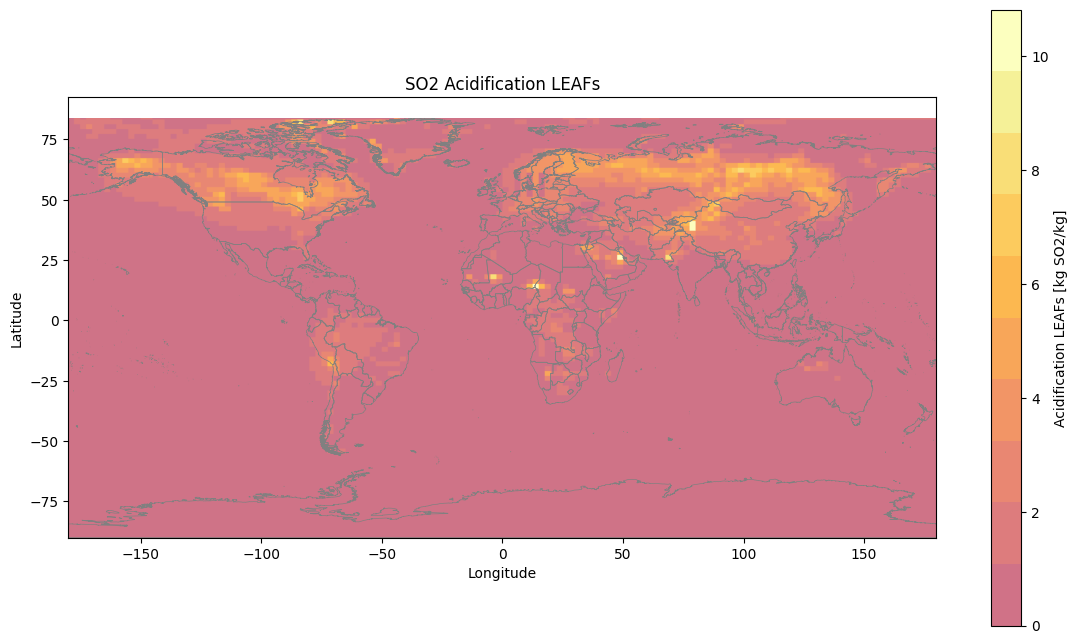

In [87]:
mp.plot_raster_on_world_extremes_cutoff("../LEAFs/acidification/rasters/acid_so2.tif", "SO2 Acidification LEAFs", "Acidification LEAFs [kg SO2/kg]", alpha=0, quantiles=10, cmap="inferno")

Things look good

## Step 3 - Region averages
Now that LEAFs have been generated and rasterized, regional averages can be generated

### 3.1 Country averages

In [22]:
# Loading country shapefile
country_shp = gpd.read_file("../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp")

In [29]:
gpck_ac_country, df_ac_country = mc.build_cfs_gpkg_from_rasters(
    input_folder = "../LEAFs/acidification/rasters/",
    output_folder = "../LEAFs/acidification/",
    layer_name="acid_leaf_country",
    master_gdf=country_shp,              # e.g., countries, subcountries, or ecoregions
    master_key="ADM0_NAME",                 # must be 'ADM0_NAME' for countries, 'ADM1_CODE' for subcountries, and 'ECO_NAME' for ecoregions
    result_key="country",                 # must match the column emitted by your calc gdf
    input_raster_key="acid_",
    cf_name="acidification",
    cf_unit="kg so2-eq./kg",
    area_type="country",
    calc_kwargs=dict(outlier_method=None),  # No outlier method applied
    reset_gpkg=True,
    promote_to_multi=True,
    add_provenance=True,
    # run_test=True                             # Use run test to run the first 3 files
)

print(f"Wrote {df_ac_country.shape[0]} rows into {gpck_ac_country}")

2025-10-21 17:09:56,270 - INFO - Building 'acid_leaf_country' from rasters in ../LEAFs/acidification/rasters/ into ../LEAFs/acidification/ (../LEAFs/acidification/acidification_country.gpkg)



Processing rasters (acid_leaf_country):   0%|          | 0/3 [00:00<?, ?raster/s]

2025-10-21 17:10:02,569 - INFO - Calculating acidification for nh3...
Calculating acidification for nh3...


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: '../LEAFs/acidification/acidification_country.gpkg'

Checking results

In [ ]:
gpck_ac_country_geom = gpd.read_file(gpck_ac_country, layer="geometry_layer")
gpck_ac_country_values = gpd.read_file(gpck_ac_country, layer="acid_leaf_country")

In [ ]:
gpck_ac_country_values.head()

,ADM0_NAME,flow_name,cf,cf_median,cf_std,_source_file
0,Abyei,nh3,0.997324,0.997324,4.440892e-16,acid_nh3.tif
1,Afghanistan,nh3,3.747787,2.855080,1.751931e+00,acid_nh3.tif
2,Aksai Chin,nh3,5.187881,6.174969,1.045882e+00,acid_nh3.tif
3,Albania,nh3,2.305967,2.185473,9.394606e-01,acid_nh3.tif
4,Algeria,nh3,1.021824,1.020121,7.482444e-02,acid_nh3.tif


In [ ]:
ac_country = gpck_ac_country_geom.merge(gpck_ac_country_values.drop(columns="_source_file"), how="left", on="ADM0_NAME")

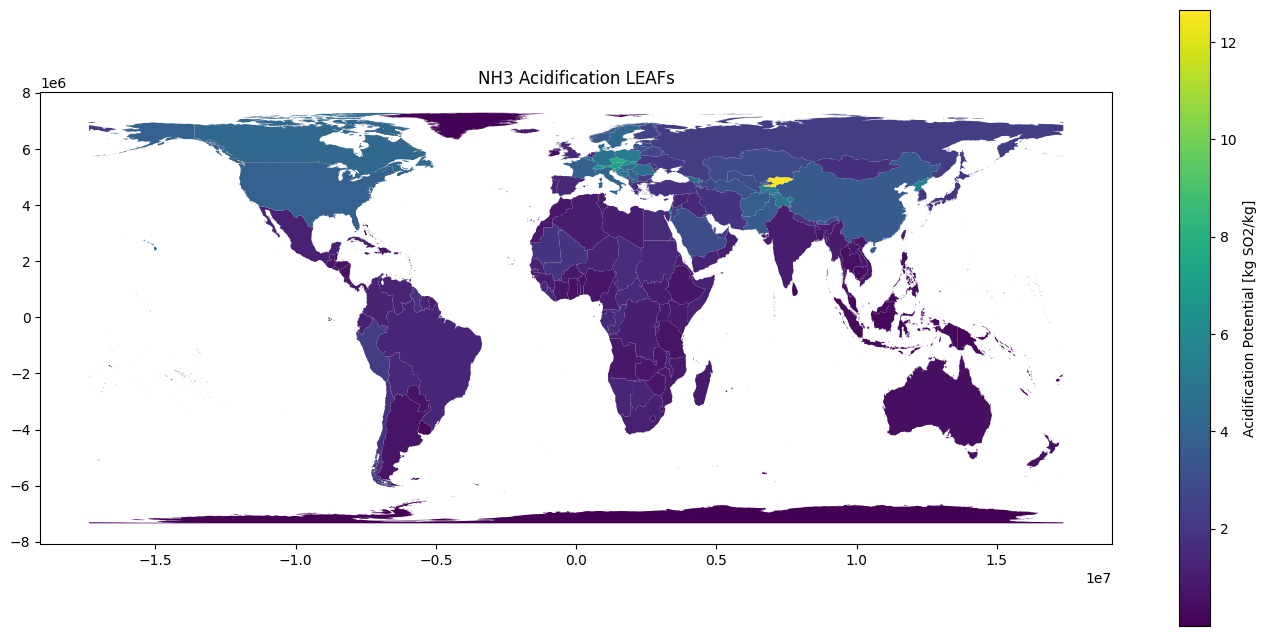

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8)) 
ac_country[ac_country["flow_name"]=="nh3"].plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Acidification Potential [kg SO2/kg]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("NH3 Acidification LEAFs")
plt.tight_layout() 
plt.show()

Which looks ok.

### 3.2 Sub-countries
Continuing. Loading files

In [ ]:
subcountry_shp = gpd.read_file("../data/CountryLayers/SubCountry_Level1/g2015_2014_1.shp")

Running calculations

In [ ]:
gpkg_ac_sc, df_ac_sc = mc.build_cfs_gpkg_from_rasters(
    input_folder = "../LEAFs/acidification/rasters/",
    output_folder = "../LEAFs/acidification/",
    layer_name="acid_leaf_subcountry",
    master_gdf=subcountry_shp,              # e.g., countries, subcountries, or ecoregions
    master_key="ADM1_CODE",                 # must be 'ADM0_NAME' for countries, 'ADM1_CODE' for subcountries, and 'ECO_NAME' for ecoregions
    result_key="ADM1_CODE",                 # must match the column emitted by your calc gdf
    input_raster_key="acid_",
    cf_name="soil_erosion",
    cf_unit="kg so2-eq./kg",
    area_type="subcountry",
    calc_kwargs=dict(outlier_method=None),  # No outlier filtering method needed
    reset_gpkg=True,
    promote_to_multi=True,
    add_provenance=True,
    # run_test=True                             # Use run test to run the first 3 files
)

print(f"Wrote {df_ac_sc.shape[0]} rows into {gpkg_ac_sc}")

NameError: name 'subcountry_shp' is not defined

Checking outputs...

In [ ]:
gpck_ac_subcountry_geom = gpd.read_file(gpkg_ac_sc, layer="geometry_layer")
gpck_ac_subcountry_values = gpd.read_file(gpkg_ac_sc, layer="acid_leaf_subcountry")

In [ ]:
gpck_ac_subcountry_values.head()

,ADM1_CODE,flow_name,cf,cf_median,cf_std,_source_file
0,40542,nh3,0.814382,0.794068,5.842737e-02,acid_nh3.tif
1,40543,nh3,0.794068,0.794068,0.000000e+00,acid_nh3.tif
2,40544,nh3,0.794068,0.794068,1.110223e-16,acid_nh3.tif
3,40545,nh3,0.794068,0.794068,1.110223e-16,acid_nh3.tif
4,40546,nh3,1.037538,1.032421,1.530803e-02,acid_nh3.tif


In [ ]:
ac_subcountry = gpck_ac_subcountry_geom.merge(gpck_ac_subcountry_values.drop(columns="_source_file"), how="left", on="ADM1_CODE")

Plotting

c:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\.venv\Lib\site-packages\geopandas\geodataframe.py:1896: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


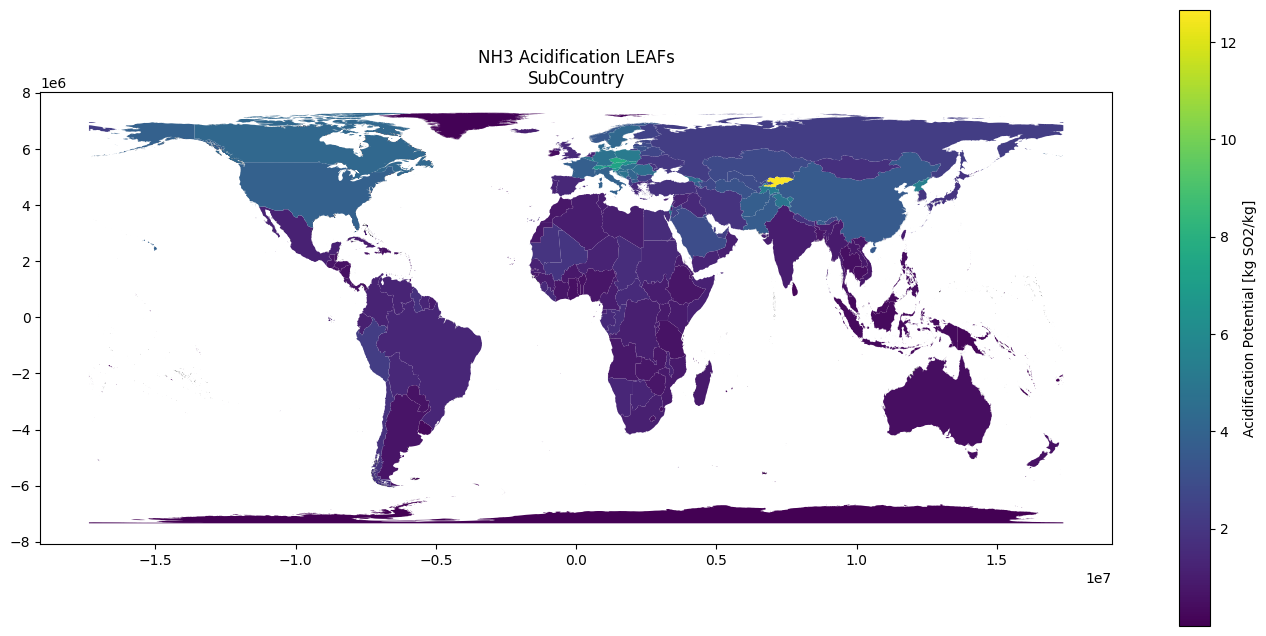

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8)) 
ac_country[ac_subcountry["flow_name"]=="nh3"].plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Acidification Potential [kg SO2/kg]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("NH3 Acidification LEAFs\nSubCountry")
plt.tight_layout() 
plt.show()

Which looks ok.

### 3.3 Ecoregions
Finally, ecoregions

In [ ]:
er_shp = gpd.read_file("../data/Ecoregions2017/Ecoregions2017.shp")

In [ ]:
gpkg_path_er, df_results_er = mc.build_cfs_gpkg_from_rasters(
    input_folder = "../LEAFs/acidification/rasters/",
    output_folder = "../LEAFs/acidification/",
    layer_name="acid_leaf_ecoregions",
    master_gdf=er_shp,              # e.g., countries, subcountries, or ecoregions
    master_key="OBJECTID",                 # must be 'ADM0_NAME' for countries, 'ADM1_CODE' for subcountries, and 'ECO_NAME' for ecoregions
    result_key="er_geom_id",                 # must match the column emitted by your calc gdf
    input_raster_key="acid_",
    cf_name="soil_erosion",
    cf_unit="kg so2-eq./kg",
    area_type="ecoregion",
    calc_kwargs=dict(outlier_method=None),  # No outlier filtering method needed
    reset_gpkg=True,
    promote_to_multi=True,
    add_provenance=True,
    # run_test=True                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results_er.shape[0]} rows into {gpkg_path_er}")

2025-10-21 14:16:49,635 - INFO - Building 'acid_leaf_ecoregions' from rasters in ../LEAFs/acidification/rasters/ into ../LEAFs/acidification/ (../LEAFs/acidification/soil_erosion_ecoregion.gpkg)



Processing rasters (acid_leaf_ecoregions):   0%|          | 0/3 [00:00<?, ?raster/s]

2025-10-21 14:16:53,685 - INFO - Calculating soil_erosion for nh3...
Calculating soil_erosion for nh3...
2025-10-21 14:20:45,751 - INFO - Calculating soil_erosion for nox...
Calculating soil_erosion for nox...
2025-10-21 14:24:09,346 - INFO - Calculating soil_erosion for so2...
Calculating soil_erosion for so2...
2025-10-21 14:27:49,610 - INFO - Wrote 2541 attribute rows into ../LEAFs/acidification/soil_erosion_ecoregion.gpkg (geometry layer='geometry_layer', values layer='acid_leaf_ecoregions').


Wrote 7623 rows into ../LEAFs/acidification/soil_erosion_ecoregion.gpkg


Checking outputs...

In [ ]:
gpck_ac_er_geom = gpd.read_file(gpkg_path_er, layer="geometry_layer")
gpck_ac_sr_values = gpd.read_file(gpkg_path_er, layer="acid_leaf_ecoregions")

In [ ]:
gpck_ac_sr_values.head()

,OBJECTID,flow_name,cf,cf_median,cf_std,_source_file
0,1.0,nh3,0.000000,0.000000,0.000000,acid_nh3.tif
1,2.0,nh3,0.083384,0.083798,0.002258,acid_nh3.tif
2,3.0,nh3,1.307653,1.227140,0.425980,acid_nh3.tif
3,4.0,nh3,4.597294,5.258521,1.377593,acid_nh3.tif
4,5.0,nh3,1.315695,1.319718,0.239972,acid_nh3.tif


In [ ]:
ac_er = gpck_ac_er_geom.merge(gpck_ac_sr_values.drop(columns="_source_file"), how="left", on="OBJECTID")

Plotting...

c:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\.venv\Lib\site-packages\geopandas\geodataframe.py:1896: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


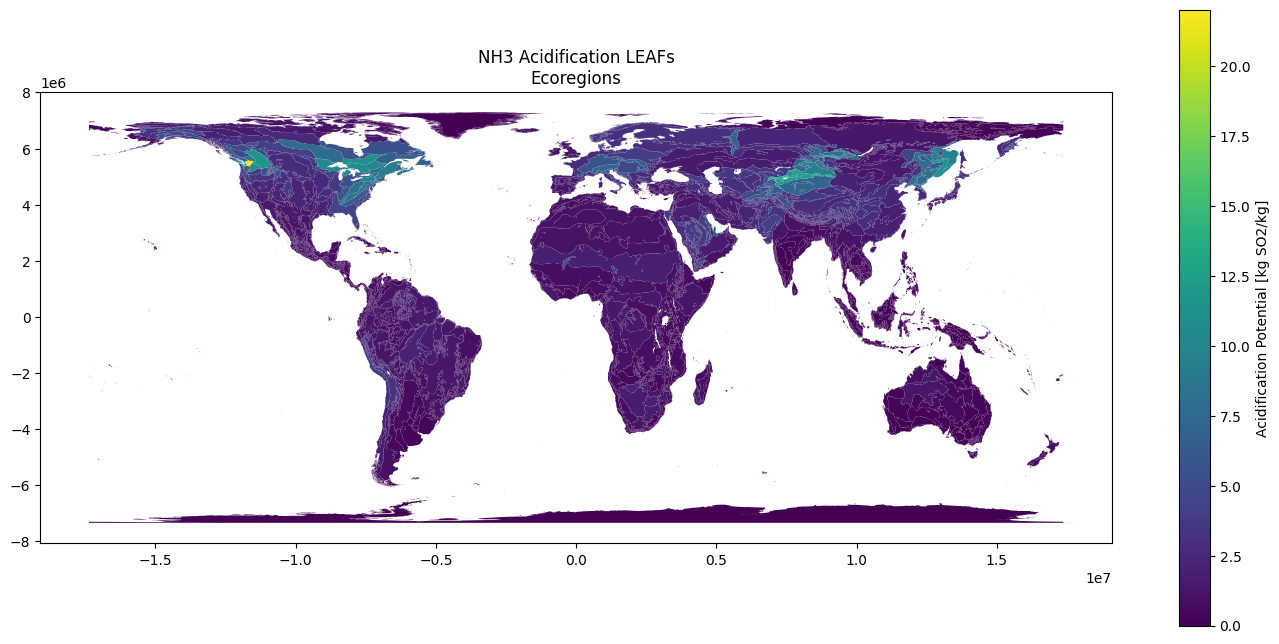

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8)) 
ac_er[ac_subcountry["flow_name"]=="nh3"].plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "Acidification Potential [kg SO2/kg]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("NH3 Acidification LEAFs\nEcoregions")
plt.tight_layout() 
plt.show()

Finishing the calculations...